<a href="https://colab.research.google.com/github/Hyrysake/My_Data_Science/blob/main/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитайте csv файл (використовуйте функцію read_csv)

In [ ]:
df = pd.read_csv('bestsellers with categories.csv')

Виведіть перші п'ять рядків (використовується функція head)

In [ ]:
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [ ]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет? - 351

In [ ]:
df['Name'].unique()
unique_sum = len(df['Name'].unique())
print(unique_sum)

351


In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

Чи є в якихось змінних пропуски? - Ні

In [ ]:
NaN = df.isna().sum()
NaN

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

Які є унікальні жанри? Non Fiction, Fiction

In [ ]:
unique = df['genre'].unique()
unique

array(['Non Fiction', 'Fiction'], dtype=object)

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

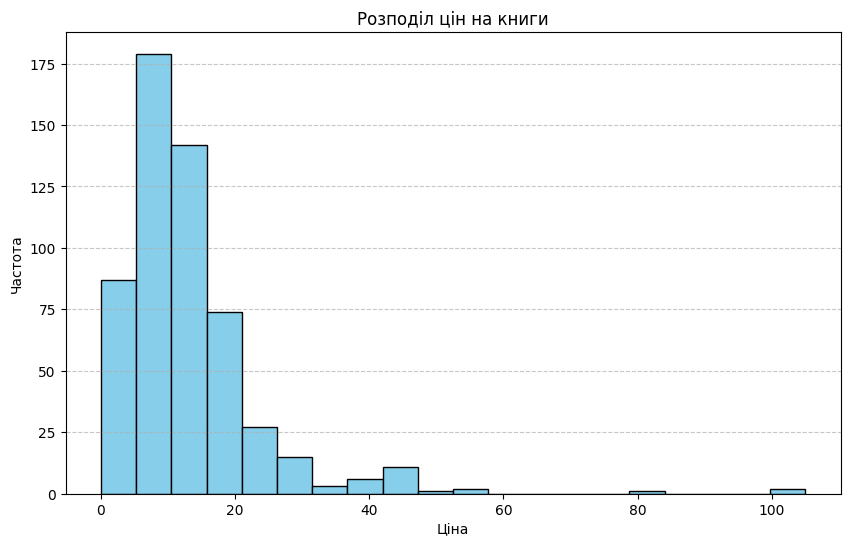

In [ ]:
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Додана сітка
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0

In [ ]:
print("\nМаксимальна ціна:", df['price'].max())
print("Мінімальна ціна:", df['price'].min())
print("Середня ціна:", df['price'].mean())
print("Медіанна ціна:", df['price'].median())


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [ ]:
max_rating = df['user_rating'].max()
print("\nНайвищий рейтинг у датасеті:", max_rating)


Найвищий рейтинг у датасеті: 4.9


In [ ]:
books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print("Кількість книг з найвищим рейтингом:", books_with_max_rating)

Кількість книг з найвищим рейтингом: 52


In [ ]:
max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print("Книга з найбільшою кількістю відгуків:", max_reviews_book)

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [ ]:
books_2015 = df[df['year']==2015]
num_books_in_2015 = len(books_2015)
print(f"Кількість книг в 2015: {num_books_in_2015}")

top_books_2015 = df[(df['year']==2015)]
expensive_book = top_books_2015 [top_books_2015 ['price']==top_books_2015 ['price'].max()]

print("Найдорожна книга, яка ввійшла в топ-50 в 2015:")
expensive_book[['name', 'price']]

Кількість книг в 2015: 50
Найдорожна книга, яка ввійшла в топ-50 в 2015:


,name,price
277,Publication Manual of the American Psychologic...,46


In [ ]:
books_2010 = df[df['year']==2010]
num_books_in_2010 = len(books_2010)
print(f"Number of books in 2010: {num_books_in_2010}")

books_2010_genre_fiction = df[((df['year']==2010)&(df['genre']=='Fiction'))]
sum_books = len(books_2010_genre_fiction)

print("Кількість кних, які за жанром є художньою літературою та ввійшли в топ-50 в 2010:", sum_books)

Number of books in 2010: 50
Кількість кних, які за жанром є художньою літературою та ввійшли в топ-50 в 2010: 20


In [ ]:
high_rated_books = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print("Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:", high_rated_books)

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


In [ ]:
sorted_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
print("\nОстання книга у відсортованому списку:", sorted_books_2015.iloc[-1]['name'])


Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [ ]:
genre_prices = df.groupby('genre')['price'].agg([max, min])
print("\nМаксимальна та мінімальна ціни для кожного з жанрів:")
print("Максимальна ціна для жанру Fiction:", genre_prices.loc['Fiction', 'max'])
print("Мінімальна ціна для жанру Fiction:", genre_prices.loc['Fiction', 'min'])
print("Максимальна ціна для жанру Non Fiction:", genre_prices.loc['Non Fiction', 'max'])
print("Мінімальна ціна для жанру Non Fiction:", genre_prices.loc['Non Fiction', 'min'])


Максимальна та мінімальна ціни для кожного з жанрів:
Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
author_books_count = df.groupby('author').size().reset_index(name='book_count')
print("\nРозмірність таблиці кількості книг для кожного з авторів:", author_books_count.shape)
print("Автор з найбільшою кількістю книг:", author_books_count.loc[author_books_count['book_count'].idxmax(), 'author'])
print("Кількість книг у цього автора:", author_books_count['book_count'].max())
author_books_count.head()


Розмірність таблиці кількості книг для кожного з авторів: (248, 2)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг у цього автора: 12


,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index(name='avg_rating')
print("\nАвтор з найнижчим середнім рейтингом:", author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin(), 'author'])
print("Середній рейтинг у цього автора:", author_avg_rating['avg_rating'].min())
author_avg_rating.head()


Автор з найнижчим середнім рейтингом: Donna Tartt
Середній рейтинг у цього автора: 3.9


,author,avg_rating
0,Abraham Verghese,4.6
1,Adam Gasiewski,4.4
2,Adam Mansbach,4.8
3,Adir Levy,4.8
4,Admiral William H. McRaven,4.7


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну. Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [ ]:
author_stats = pd.concat([author_books_count.set_index('author'), author_avg_rating.set_index('author')], axis=1)
author_stats.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True], inplace=True)
print("\nПерший автор у списку:", author_stats.index[0])


Перший автор у списку: Muriel Barbery


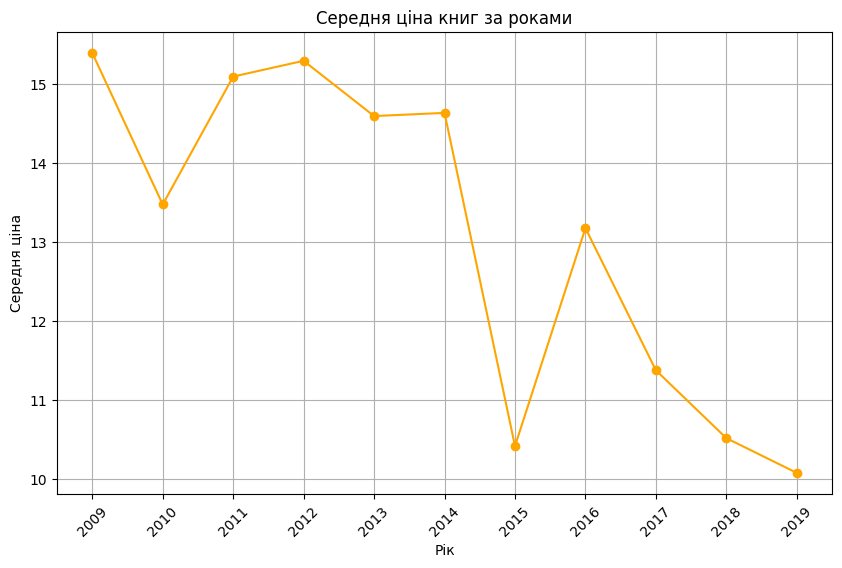

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('year')['price'].mean(), marker='o', linestyle='-', color='orange')
plt.title('Середня ціна книг за роками')
plt.xlabel('Рік')
plt.ylabel('Середня ціна')
plt.xticks(df['year'].unique(), rotation=45)
plt.grid()
plt.show()

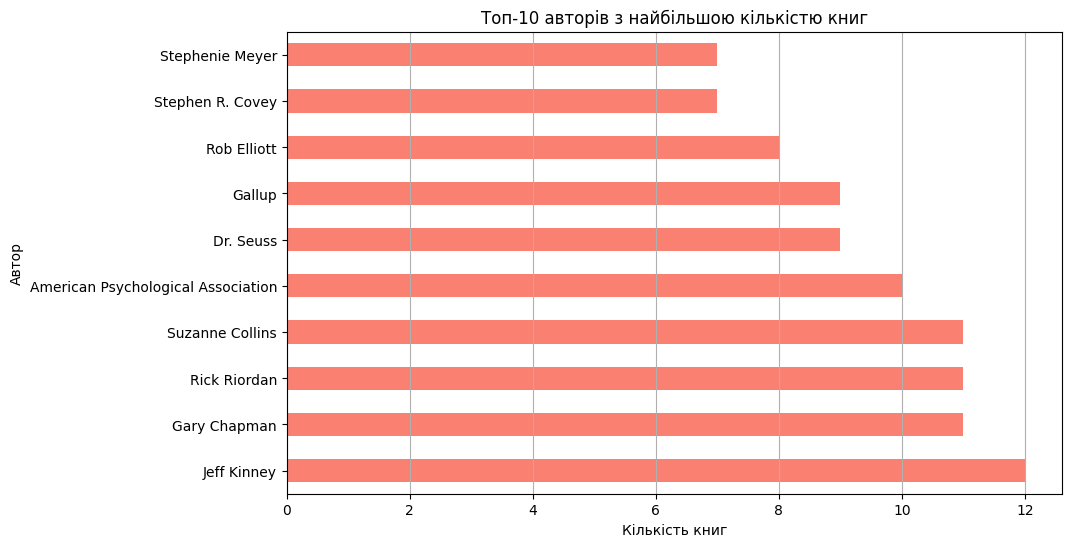

In [ ]:
top_authors = df['author'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh', color='salmon')
plt.title('Топ-10 авторів з найбільшою кількістю книг')
plt.xlabel('Кількість книг')
plt.ylabel('Автор')
plt.grid(axis='x')
plt.show()

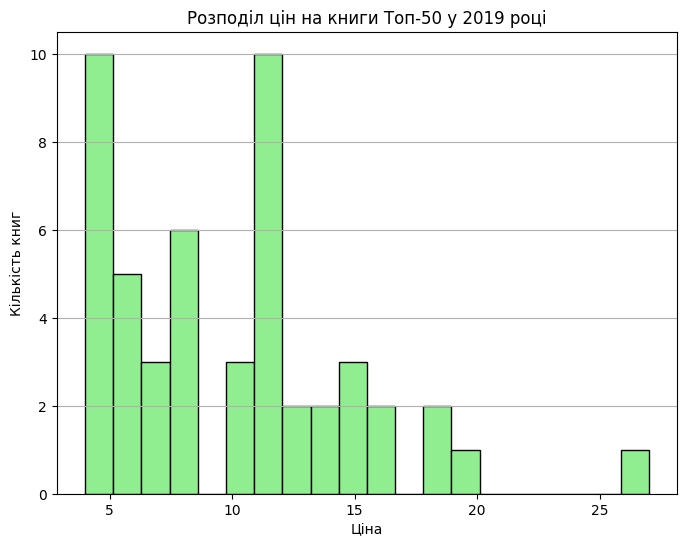

In [ ]:
books_2019 = df[df['year'] == 2019]
plt.figure(figsize=(8, 6))
plt.hist(books_2019['price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Розподіл цін на книги Топ-50 у 2019 році')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.grid(axis='y')
plt.show()